# Altering the frequency of the input

First run the ```simple_network_creation.ipynb``` so that you have a ```networks/simple_example``` folder in the ```example/notebooks``` folder with the small network.

In [1]:
import os
from snudda.input import SnuddaInput
network_path = os.path.join("networks","simple_example")
si = SnuddaInput(network_path=network_path, 
                 input_config_file=os.path.join("input_config","simple-input-2.json"),
                 verbose=False)
si.generate()

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data/ from networks/simple_example/network-config.json
Loading 200 neurons with 23994 synapses and 0 gap junctions
Writing spikes to networks/simple_example/input-spikes.hdf5


In [2]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file)

Loading 200 neurons with 23994 synapses and 0 gap junctions


Each neuron has a neuron ID (e.g. 5), a neuron morphology (e.g. dSPN_1) and is of a neuron type (e.g. dSPN). When determining which input block should be used for input generation for a neuron the algorithm prioritises neuron ID block over morphology specific blocks, and lastly neuron type specific blocks. Only one input configuration block is choosen per neuron, but there can be multiple types of input specified in the config block.



The input config file ```simple-input-2.json``` is as follows:


```
{
	"dSPN": {
		"Ctx": {
			"generator": "poisson",
			"start": [2, 5],
			"end": [3, 7],
			"frequency": [4, 2],
			"conductance": 0.5e-9,
			"nInputs": 20,
			"modFile": "tmGlut"
		}
	},

	"dSPN_0": {
		"Ctx": {
			"generator": "poisson",
			"start": 0,
			"end": 10,
			"frequency": 1,
			"conductance": 0.5e-9,
			"nInputs": 20,
			"modFile": "tmGlut"
		}
	},

	"5": {
		"Ctx": {
			"generator": "poisson",
			"start": 2,
			"end": 10,
			"frequency": 3,
			"conductance": 0.5e-9,
			"nInputs": 25,
			"modFile": "tmGlut"
		}
	}
}
```

Notice that ```start```, ```end``` and ```frequency``` can be either scalars or vectors.

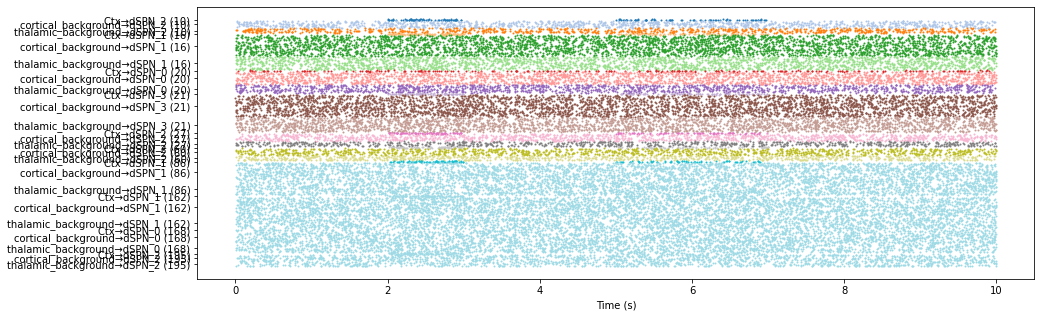

In [3]:
spi.plot_input("dSPN", 10, fig_size=(15,5))

In the next plot exemplify how different neurons input is set. Note that the numbering assumes that the simple network generation was run with random seed 12345.

The first two (neuron 1 and 13) use the dSPN type config block (since dSPN_0 does not apply to them). Neuron 5 has its own config block and ignore the dSPN and dSPN_0 config block. The last three (neuron 12, 32 and 66) use the dSPN_0 morphology config block.

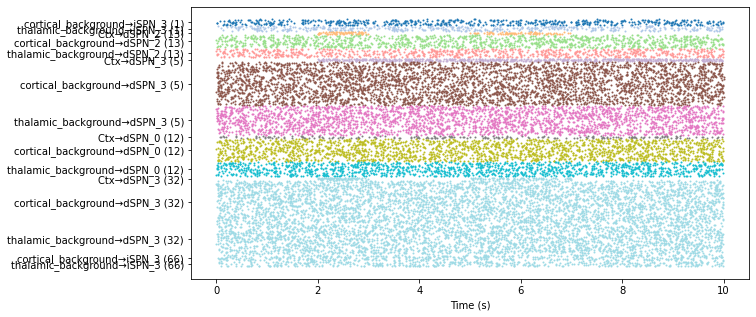

In [4]:
spi.plot_input_to_target([1,13,5,12,32,66])